# DATA EXPLORATION
**Context:** Air Quality Forecasting (Time Series Regression)

Data exploration is the first step in the journey of extracting insights from raw datasets. Data exploration serves as the compass that guides we through the vast sea of information. It involves getting to know the data intimately, understanding its structure, and uncovering valuable nuggets that lay hidden beneath the surface.

Data exploration doesn’t stop after the initial stage before feature engineering; it should be performed throughout the entire system development process. After feature construction, we also need to redo EDA to verify whether the processed data is truly clean. Moreover, after building and analyzing the model, it is common to return to EDA to continue uncovering hidden insights within the dataset. The deeper my understanding of the data, the sooner we can explain model behaviors and make appropriate adjustments.

## I. Data Understanding
**Familiarization:** Get an overview of the data format, size, and source.

**Variable Identification:** Understand the meaning and purpose of each variable in the dataset.

### 1. Import Libraries and Load Dataset
At the beginning, we need import all necessary libraries as well as load the raw data in folder `data/raw` by `pandas`

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

Load Dataset

In [ ]:
path = "../data/raw/vietnam_air_quality.csv"
try:
    df = pd.read_csv(path)
    print("[SUCCESS]: Loading dataset successful")
except Exception as e:
    print(f"[ERROR]: Loading dataset fail: {e}")

[SUCCESS]: Loading dataset successful


### 2. Basic Information
In this section, we will focus explore to answer four main question is:
- How many rows does your dataset have? 
- How many columns does your dataset have? 
- What does each row represent?
- What is the overall size of the dataset? 


Overview of Data Structure

In [6]:
df.head()

,timestamp,city,lat,lon,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
0,2023-01-01T00:00,Biên Hòa,10.914111,106.891717,133,Unhealthy for Sensitive,2,23.0,64,0.0,10.3,12,1010.3,100,65.0,95.0,993.0,84.4,25.0,37.5
1,2023-01-01T00:00,Buôn Ma Thuột,12.661262,108.031021,53,Moderate,1,17.7,88,0.3,7.7,101,968.4,100,13.6,23.2,485.0,1.8,105.0,2.2
2,2023-01-01T00:00,Bắc Ninh,21.175170,106.059398,146,Unhealthy for Sensitive,2,11.1,75,0.0,6.2,353,1023.5,0,52.4,74.7,678.0,8.8,58.0,15.4
3,2023-01-01T00:00,Cao Bằng,22.650998,106.259068,82,Moderate,1,10.8,83,0.0,4.6,162,996.6,100,31.9,45.5,528.0,6.4,45.0,7.6
4,2023-01-01T00:00,Cao Lãnh,10.460179,105.612291,86,Moderate,1,24.4,55,0.0,12.0,7,1013.9,100,21.8,32.2,693.0,23.0,47.0,3.3


In [7]:
df.tail()

,timestamp,city,lat,lon,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
864989,2025-11-26T00:00,Vĩnh Long,10.252694,105.941002,75,Moderate,1,24.4,72,0.0,11.3,13,1009.0,99,20.4,20.8,391.0,12.4,71.0,14.8
864990,2025-11-26T00:00,Điện Biên Phủ,21.490438,103.104635,53,Moderate,1,9.9,73,0.0,3.6,84,915.1,0,17.1,18.0,227.0,16.6,51.0,9.0
864991,2025-11-26T00:00,Đà Lạt,11.908263,108.457209,53,Moderate,1,15.9,80,0.0,24.0,27,877.4,98,14.4,15.4,214.0,1.7,112.0,1.5
864992,2025-11-26T00:00,Đà Nẵng,16.068000,108.212000,100,Moderate,1,21.0,89,0.2,4.9,360,1015.2,100,16.9,21.7,554.0,1.0,116.0,3.8
864993,2025-11-26T00:00,Đông Hà,16.802493,107.095338,79,Moderate,1,21.2,76,0.0,9.6,6,1014.4,100,30.9,37.1,269.0,5.0,106.0,8.1


Overview about Size of Dataset

In [8]:
# Display the shape of the dataset
print(f"Data shape: {df.shape}")

# Display rows of the dataset
print(f"Amount of rows is: {df.shape[0]}")

# Display columns of the dataset
print(f"Amount of columns is: {df.shape[1]}")


Data shape: (864994, 20)
Amount of rows is: 864994
Amount of columns is: 20


**In summary:** 
- With size `864994x20` it proved this is a rich dataset, large enough to run accurate predictive models and wide enough for in-depth analysis of the relationship between weather and environmental pollution. 

- Each row represents air quality and weather data for a specific city at a given point in time from **January 1, 2023** to **November 26, 2025**.

### 3. Column Inventory


Columns of the Dataset

In [ ]:
# Display the columns of the dataset
print("Columns:", df.columns.tolist())

Columns: ['timestamp', 'city', 'lat', 'lon', 'aqi', 'pollution_level', 'pollution_class', 'temp', 'humidity', 'rain', 'wind_speed', 'wind_dir', 'pressure', 'cloud', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']


Meaning and Definition of each Column

- **Time and Position**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**timestamp**|Datetime|The specific date and time observation (e.g., `2023-01-01T08:00`).|
|**city**|String|The name of the province or city (e.g., `Ha Noi`, `Ho Chi Minh City`).|
|**lat**|Degree|Latitude coordinate of the location.|
|**lon**|Degree|Longitude coordinate of the location.|

- **Pollution Index**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**aqi**|Index|**Air Quanlity Index (US EPA Standard)**. The target variable representing the overall air quanlity status.|
|**pollution_level**|String|Categorical description of the AQI (e.g., `Good`, `Moderate`, `Unhealthy`).|
|**pollution_class**|Integer|Numerical class label for the AQI (0 to 5).|

- **Weather Factor**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**temp**|°C|Ambient temperature measured at 2 meters above ground.|
|**humidity**|%|Relative humidity measured at 2 meters above ground.|
|**rain**|mm|Total precipitation (rain, showers, snow) in the preceding hour.|
|**wind_speed**|km/h|Wind speed measured at 10 meters above ground.|
|**wind_dir**|Degree|Wind direction measured at 10 meters (0° = North, 90° = East).|
|**pressure**|hPa|Atmospheric pressure at the surface level.|
|**cloud**|%|Total cloud cover percentage (0% = clear sky, 100% = overcast).|

- **Pollution Concentration**

|Featute Name|Unit|Meaning|
|:-----------|:---|:------|
|**pm2_5**|$\mu g/m^{3}$|Concentration of Particulate Matter < 2.5 micrometers (Fine dust). The main driver of AQI.|
|**pm10**|$\mu g/m^{3}$|Concentration of Particulate Matter < 10 micrometers (Coarse dust).|
|**co**|$\mu g/m^{3}$|Concentration of Carbon Monoxide.|
|**no2**|$\mu g/m^{3}$|Concentration of Nitrogen Dioxide.|
|**o3**|$\mu g/m^{3}$|Concentration of Ozone.|
|**so2**|$\mu g/m^{3}$|Concentration of Sulphur Dioxide.|

Data Types

In [11]:
# Display data types of each column
df.dtypes

timestamp           object
city                object
lat                float64
lon                float64
aqi                  int64
pollution_level     object
pollution_class      int64
temp               float64
humidity             int64
rain               float64
wind_speed         float64
wind_dir             int64
pressure           float64
cloud                int64
pm2_5              float64
pm10               float64
co                 float64
no2                float64
o3                 float64
so2                float64
dtype: object

**In summary**:
- Most columns are very important:
    - **Pollutants (pm2_5, pm10, no2,...)**: These are the direct causes of the AQI index. Analyzing them helps to understand the sources of pollution.
    - **Meteorological factors (temp, wind, rain...)**: These are crucial for correlation analysis. For example, strong winds can dilute dust (decreasing AQI), while high humidity can trap dust (increasing AQI).
    - **Time & Location (timestamp, city)**: These are necessary for trend analysis over time and geographic comparison (geospatial analysis).

- Columns `lat` and `lon` should be dropped because when they serve as proxies for the location, which is now explicitly represented by the `city` column derived from the API mapping process

-  The `timestamp` column is currently of type `object` and should be converted to `datetime` for proper time series analysis and it will execute in step **Data Preprocessing**

### 4. Numerical Columns Analysis 


Numerical Columns in Dataset

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Amount of numerical columns is: {len(numeric_cols)}")
print(numeric_cols)

Amount of numerical columns is: 17
['lat', 'lon', 'aqi', 'pollution_class', 'temp', 'humidity', 'rain', 'wind_speed', 'wind_dir', 'pressure', 'cloud', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']


Data Column Properties

|**Column**|**Property**|
|-----------|-------------|
|aqi        |Discrete|
|lat, lon, temp, humidity, rain, wind_speed, wind_dir, pressure, cloud, pm2_5, pm10, co, no2, o3, so2|Continuous|

Value Distribution

In [ ]:
df2 = df[numeric_cols].copy()
df2.drop(columns=['lat', 'lon', 'pollution_class', 'wind_dir'], inplace=True)
df2.describe().T

Visualization Distribution

In [ ]:
plot_cols = ['aqi', 'temp', 'humidity', 'rain', 'wind_speed', 'pressure', 'cloud', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']
fig, axes = plt.subplots(len(plot_cols), 2, figsize=(14, 5 * len(plot_cols)))

sns.set_style("whitegrid")
palette = sns.color_palette("Set2", len(plot_cols))
plt.subplots_adjust(hspace=0.35)

for i, col in enumerate(plot_cols):
    # Histogram Plot
    color = palette[i]
    sns.histplot(df[col], ax=axes[i, 0], bins=40, color=color, edgecolor='white')
    axes[i, 0].set_title(f'Phân phối của {col} (Histogram)', fontsize=14, weight='bold')
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].grid(alpha=0.3)

    # Box Plot
    sns.boxplot(x=df[col], ax=axes[i, 1], color=color, width=0.4, linewidth=1.5)
    axes[i, 1].set_title(f'Phân phối của {col} (Box Plot)', fontsize=14, weight='bold')
    axes[i, 1].set_xlabel(col, fontsize=12)
    axes[i, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 5. Categorical Columns Analysis

Categorical Columns in Dataset

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Amount of categorical columns is: {len(categorical_cols)}")
print(categorical_cols)

Amount of categorical columns is: 3
['timestamp', 'city', 'pollution_level']


Data Column Properties

|**Column**|**Property**|
|-----------|-------------|
|city        |Nominal|
|pollution_level|Ordinal|

Value Distribution

- Column `city`

In [17]:
unique_citys = df['city'].nunique()
print(f'Amount of city in dataset is: {unique_citys}')

Amount of city in dataset is: 34


Due to the purpose of data collection based on 34 provinces and cities, the frequency of occurrence for each province and city should be the same

- Column `pollution_level`

In [19]:
# Display distribution of pollution_level
values = df["pollution_level"].value_counts()
print(values)


pollution_level
Moderate                   469640
Good                       200558
Unhealthy for Sensitive    132209
Unhealthy                   59167
Very Unhealthy               3402
Hazardous                      18
Name: count, dtype: int64


Visualization Distribution

- Column `pollution_level`

**The air-quality levels are categorized into six pollution tiers based on the AQI**
|**AQI Level**|**AQI Range**|
|-----------|-------------|
|**Good**  |0-50|
|**Moderate**|51-100|
|**Unhealthy for Sensitive** |101-150|
|**Unhealthy**|151-200|
|**Very Unhealthy**  |201-300|
|**Hazardous**|301-500|



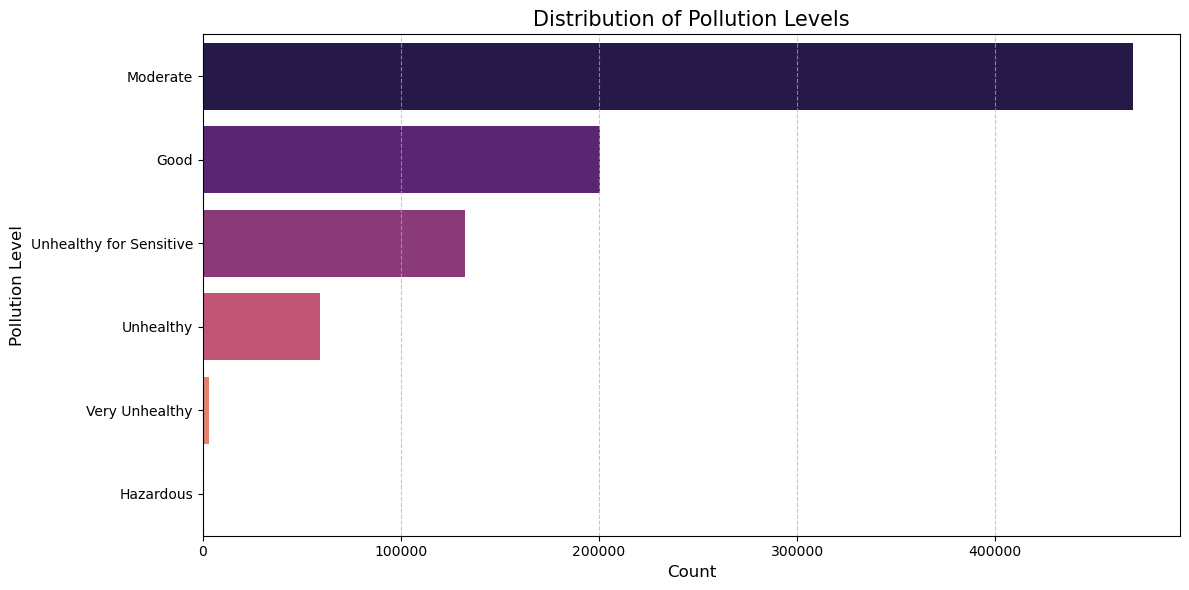

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=values, y=values.index, hue=values.index, palette="magma", legend=False
)
plt.title(f"Distribution of Pollution Levels", fontsize=15)
plt.xlabel("Count", fontsize=12)
plt.ylabel(f"Pollution Level", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## II. Data Profiling

### 1. Duplicated and Empty Row

In [1]:
print(f"Amount duplicated rows is: {df.duplicated().sum()}")
print(f"Amount empty row is: {df.isnull().all(axis=1).sum()}")


NameError: name 'df' is not defined

### 2. Missing Values

#### Tỉ lệ dữ liệu bị thiếu của các cột?

In [8]:
for col in df.columns:
    num_missing = df[col].isnull().sum()
    percent_missing = (num_missing / len(df)) * 100
    print(f'{col}: {percent_missing:.2f}%')

timestamp: 0.00%
city: 0.00%
lat: 0.00%
lon: 0.00%
aqi: 0.00%
pollution_level: 0.00%
pollution_class: 0.00%
temp: 0.00%
humidity: 0.00%
rain: 0.00%
wind_speed: 0.00%
wind_dir: 0.00%
pressure: 0.00%
cloud: 0.00%
pm2_5: 0.00%
pm10: 0.00%
co: 0.00%
no2: 0.00%
o3: 0.00%
so2: 0.00%


Dữ liệu của tất cả các cột đều không bị thiếu.

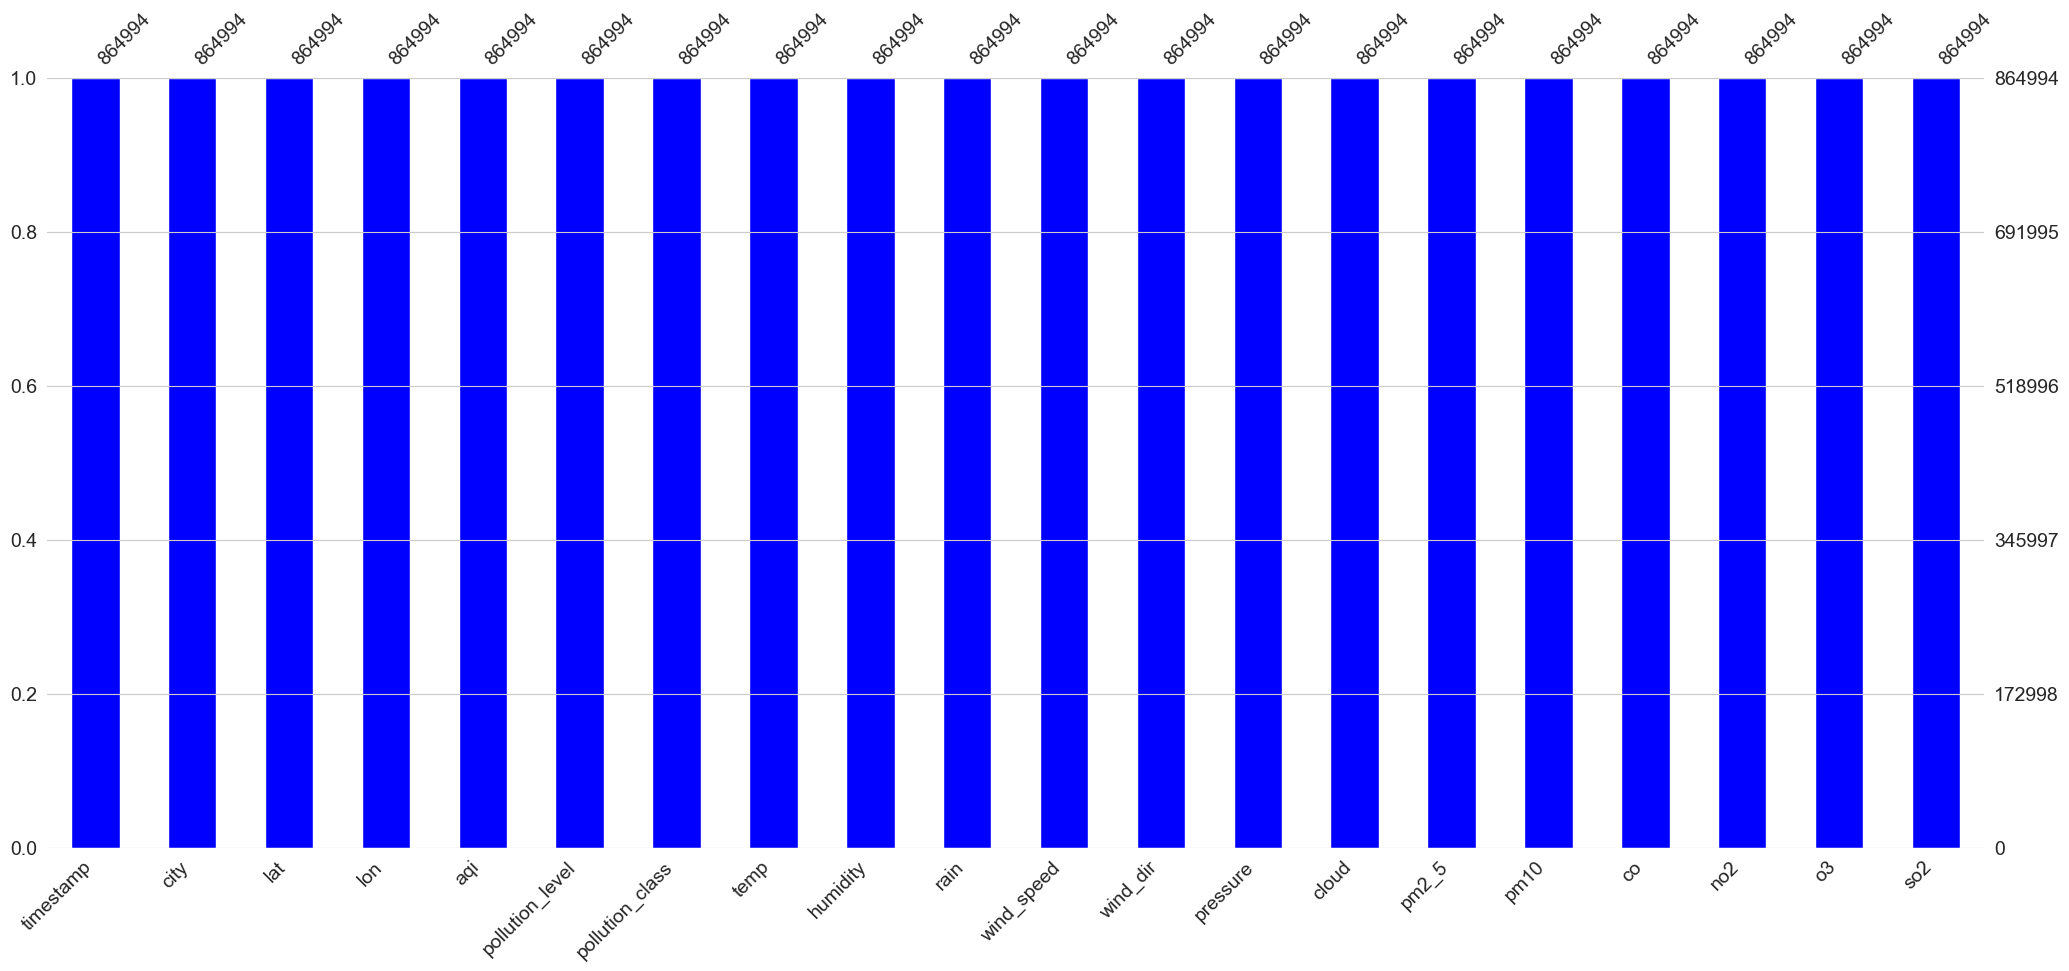

In [64]:
plt.figure(figsize=(12, 5))
msno.bar(df, color="blue", fontsize=14)
plt.show()


## IV. Relationships & Correlations

### Correlations Heatmap


In [73]:
def prepare_correlation_matrix(df):
    df_cor = df.copy()
    df_cor.drop(columns=['timestamp'], inplace=True)
    categorical_cols = df_cor.select_dtypes(include=['object']).columns.tolist()
    encoder = LabelEncoder()
    for col in categorical_cols:
        df_cor[col] = encoder.fit_transform(df_cor[col])
    
    
    correlation_matrix = df_cor.corr().round(2)
    return correlation_matrix

In [74]:
correlation_matrix = prepare_correlation_matrix(df)
correlation_matrix

,city,lat,lon,aqi,pollution_level,pollution_class,temp,humidity,rain,wind_speed,wind_dir,pressure,cloud,pm2_5,pm10,co,no2,o3,so2
city,1.00,0.12,-0.02,-0.03,-0.04,-0.04,-0.09,0.01,-0.01,-0.02,0.03,-0.23,-0.02,-0.05,-0.05,-0.06,-0.20,0.06,-0.15
lat,0.12,1.00,-0.40,0.30,0.25,0.27,-0.26,-0.02,-0.00,-0.13,-0.07,-0.05,-0.10,0.25,0.25,0.23,0.03,0.16,0.22
lon,-0.02,-0.40,1.00,-0.11,-0.09,-0.09,0.08,0.03,-0.01,0.21,0.03,0.06,0.07,-0.13,-0.11,-0.11,-0.06,0.05,-0.09
aqi,-0.03,0.30,-0.11,1.00,0.82,0.93,-0.02,-0.06,-0.06,-0.12,-0.03,0.36,-0.13,0.76,0.73,0.51,0.45,0.30,0.57
pollution_level,-0.04,0.25,-0.09,0.82,1.00,0.89,0.01,-0.06,-0.06,-0.12,-0.03,0.39,-0.11,0.59,0.59,0.43,0.37,0.25,0.47
pollution_class,-0.04,0.27,-0.09,0.93,0.89,1.00,-0.01,-0.06,-0.06,-0.12,-0.03,0.36,-0.12,0.71,0.69,0.48,0.42,0.28,0.53
temp,-0.09,-0.26,0.08,-0.02,0.01,-0.01,1.00,-0.34,0.01,0.07,0.06,0.20,0.02,-0.13,-0.10,-0.27,-0.12,0.37,-0.05
humidity,0.01,-0.02,0.03,-0.06,-0.06,-0.06,-0.34,1.00,0.16,-0.24,0.13,0.01,0.23,0.05,0.03,0.09,0.25,-0.54,0.05
rain,-0.01,-0.00,-0.01,-0.06,-0.06,-0.06,0.01,0.16,1.00,0.07,0.05,-0.00,0.16,-0.08,-0.08,-0.08,-0.04,-0.00,-0.03
wind_speed,-0.02,-0.13,0.21,-0.12,-0.12,-0.12,0.07,-0.24,0.07,1.00,-0.13,0.05,0.03,-0.19,-0.16,-0.21,-0.21,0.15,-0.11


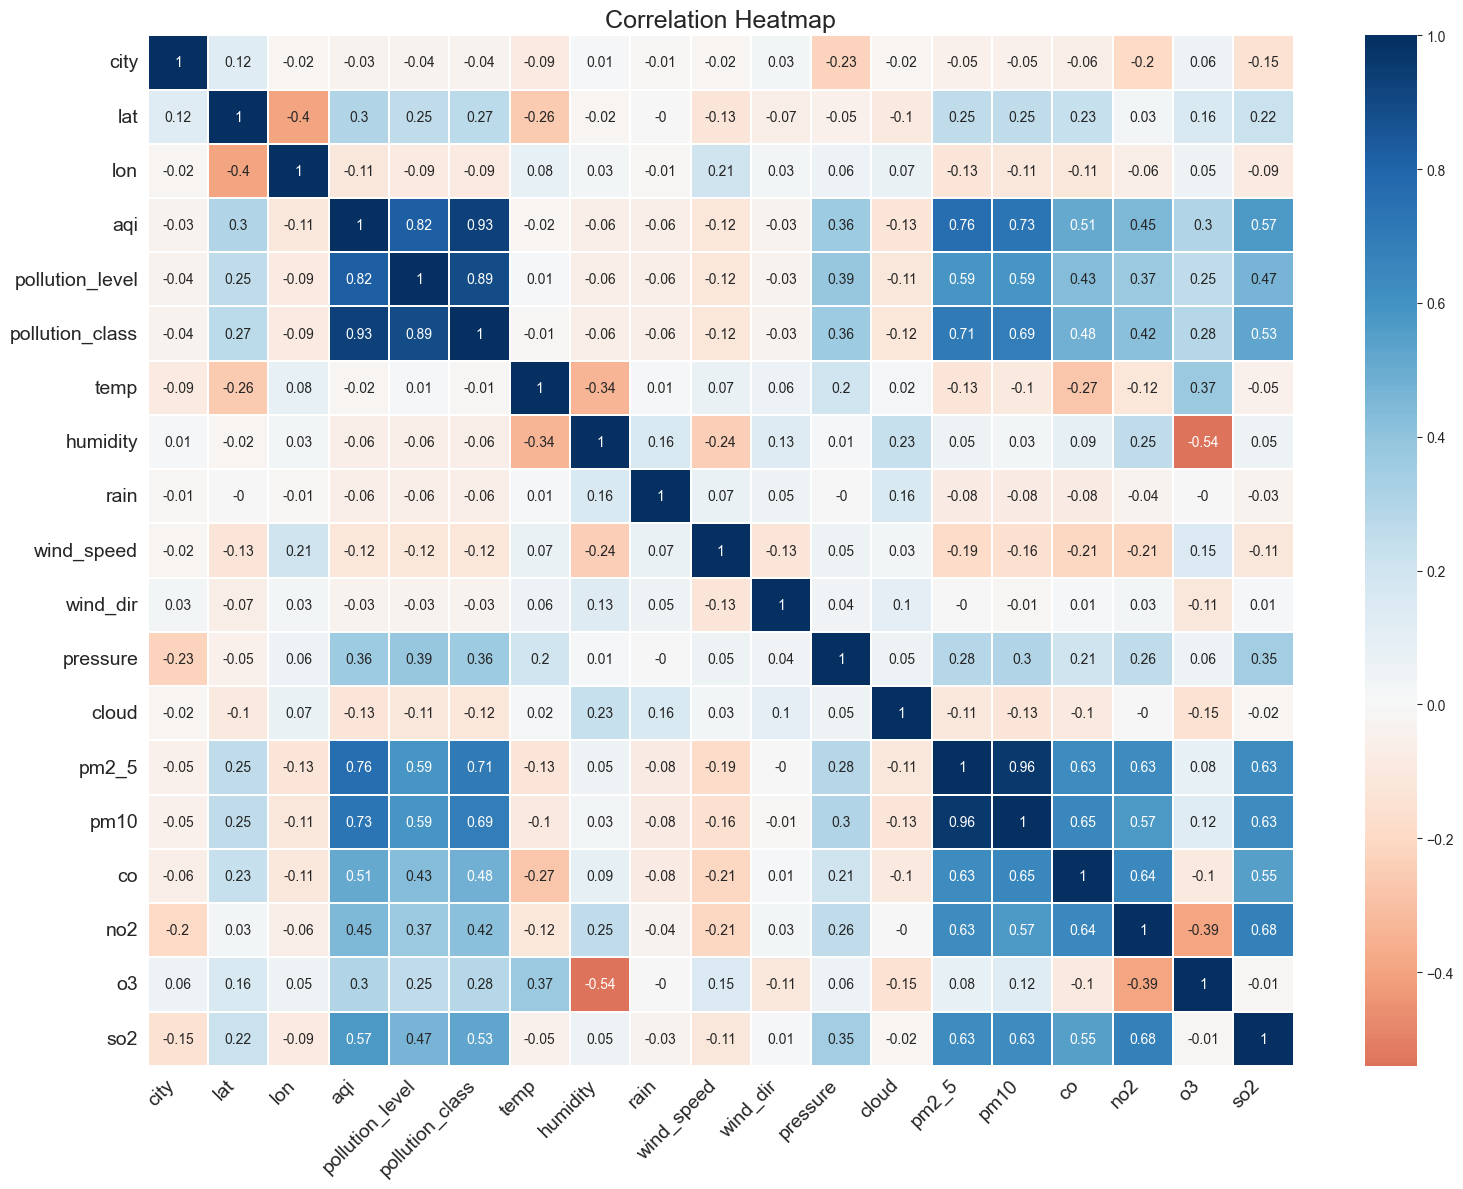

In [120]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix, 
    annot=True,        
    cmap="RdBu",      
    center=0,           
    linewidths=0.3,     
    cbar=True         
)

plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

**Nhận xét**
1. Các mối tương quan mạnh (quan hệ Dương)
- `pm2_5` và `pm10` (0.96): đây là mối tương quan dương cực kì mạnh, hợp lý vì `pm2_5` là thành phần con của `pm10`.
- `aqi` và `pollution_class` (0.93): tương quan mạnh do `pollution_class` được đánh giá dựa trên `aqi`.
2. Các mối tương quan mạnh (quan hệ âm)
- `humidity` và `o3` (-0.54): tương quân âm vừa phải.
- `humidity` và `temp` (-0.34): tương quan âm vừa phải, khi độ ẩm tăng, nhiệt độ có xu hướng giảm.

### Interactions

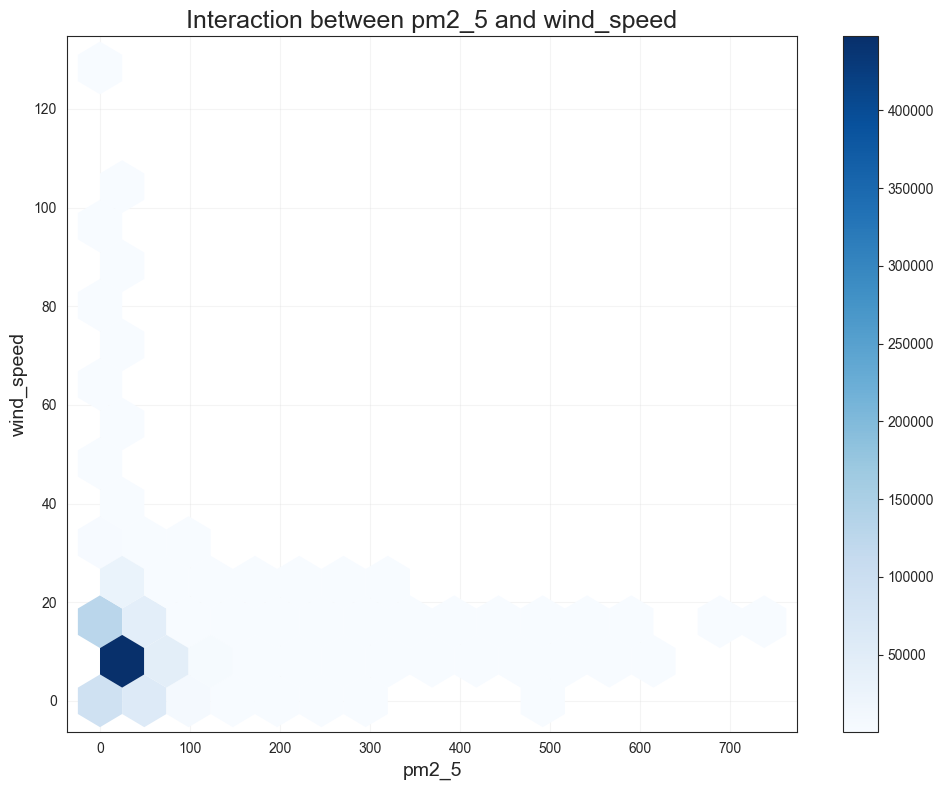

In [119]:
def plot_interaction(df, col_x, col_y):
    plt.figure(figsize=(10, 8))
    plt.hexbin(
        df[col_x], 
        df[col_y], 
        gridsize=15, 
        cmap='Blues', 
        mincnt=1,
        edgecolors='none'
    )

    plt.colorbar()
    plt.xlabel(col_x, fontsize=14)
    plt.ylabel(col_y, fontsize=14)
    plt.title(f"Interaction between {col_x} and {col_y}", fontsize=18)
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

df_numeric = df.select_dtypes(include=[np.number])
plot_interaction(df_numeric, 'pm2_5', 'wind_speed')

## IV. Meaningful Questions